In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


Mounted at /content/drive/


In [2]:
import os

In [3]:
folder = "drive/My Drive/15.076 final project"
os.chdir(folder)   

In [4]:
import pandas as pd

### Load the data
2016 data used

In [112]:
data = pd.read_csv("2016/2016_data.csv")

In [113]:
data

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,34,Female,United States of America,New York,United States of America,New York,Other,Sometimes
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Often,56,MALE,United States of America,California,Afghanistan,NaN,Support,Sometimes
1430,0,100-500,1.0,NaN,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,...,Rarely,Sometimes,52,Male,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes
1431,0,100-500,0.0,1.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,...,Sometimes,Often,30,Female,United States of America,Nebraska,United States of America,Nebraska,DevOps/SysAdmin,Sometimes


### Clean the data

1. rename the columns so they are easier to work with

In [7]:
renamed_columns = ['self_empl_flag', 'comp_num_empl', 'tech_comp_flag', 'tech_role_flag', 'provide_mh_coverage_flag',
                  'mh_coverage_awareness_flag', 'mh_employer_discussion', 'mh_resources_provided', 'mh_anonimity_flag',
                  'mh_medical_leave', 'mh_discussion_neg_itmpact', 'ph_discuworkssion_neg_impact', 'mh_discussion_cowork',
                  'mh_discussion_supervis', 'mh_eq_ph_employer', 'mh_neg_conseq_coworkers', 'own_mh_coverage_flag', 'mh_online_res_flag',
                  'mh_diagnosed_reveal_clients_flag', 'mh_diagnosed_reveal_clients_neg_impact', 'mh_diagnosed_reveal_cowork_flag', 'mh_cowork_reveal_neg_impact',
                  'mh_prod_impact', 'mh_prod_impact_perc', 'prev_employers_flag', 'prev_mh_benefits', 'prev_mh_benefits_awareness',
                  'prev_mh_discussion', 'prev_mh_resources', 'prev_mh_anonimity', 'prev_mh_discuss_neg_conseq', 'prev_ph_discuss_neg_conseq',
                  'prev_mh_discussion_cowork', 'prev_mh_discussion_supervisor', 'prev_mh_eq_ph_employer', 'prev_mh_conseq_coworkers',
                  'future_ph_discuss', 'future_ph_why_why_not', 'future_mh_discuss', 'future_mh_why_why_not', 'mh_hurt_career', 'mh_neg_view_cowork',
                  'mh_sharing_friends_fam_flag', 'mh_bad_response_workplace', 'mh_for_others_bad_response_workplace', 'mh_family_hist',
                  'mh_disorder_past', 'mh_disorder_current', 'yes_mh_diagnosis', 'maybe_mh_diagnosis', 'mh_diagnosis_profesional',
                  'yes_prof_condition_diagnosed', 'mh_sought_prof_treatm', 'mh_eff_treat_impact_on_work', 'mh_not_eff_treat_impact_on_work',
                  'age', 'gender', 'country_live', 'us_state_live', 'country_work', 'us_state_work', 'work_position', 'remote_flag']

In [8]:
data.columns = renamed_columns

2. encode gender variable (M=1, F=2, nonbinary=3)

In [9]:
data['gender'].replace(to_replace = ['Male', 'male', 'Male ', 'M', 'm',
       'man', 'Cis male', 'Male.', 'male 9:1 female, roughly', 'Male (cis)', 'Man', 'Sex is male',
       'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'male ',
       'Cis Male', 'Male (trans, FtM)',
       'cisdude', 'cis man', 'MALE'], value = 1, inplace = True)

In [10]:
data['gender'].replace(to_replace = ['Female', 'female', 'I identify as female.', 'female ',
       'Female assigned at birth ', 'F', 'Woman', 'fm', 'f', 'Cis female ', 'Transitioned, M2F',
       'Genderfluid (born female)', 'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman',
       'Cisgender Female', 'fem', 'Female (props for making this a freeform field, though)',
       ' Female', 'Cis-woman', 'female-bodied; no feelings about gender',
       'AFAB'], value = 2, inplace = True)

In [11]:
data['gender'].replace(to_replace = ['Bigender', 'non-binary', 'Other/Transfeminine',
       'Androgynous', 'Other', 'nb masculine',
       'none of your business', 'genderqueer', 'Human', 'Genderfluid',
       'Enby', 'genderqueer woman', 'mtf', 'Queer', 'Agender', 'Fluid',
       'Nonbinary', 'human', 'Unicorn', 'Genderqueer',
       'Genderflux demi-girl', 'Transgender woman'], value = 3, inplace = True)

3. Replace age data that doesn't make sense (there are a few observations with very low and very high ages. replace these values with the average age of the dataset excluding these outlier values)

In [12]:
mean_age = data[(data['age'] >= 18) | (data['age'] <= 75)]['age'].mean()

data['age'].replace(to_replace = data[(data['age'] < 18) | (data['age'] > 75)]['age'].tolist(),
                          value = mean_age, inplace = True)

4. Missing values

a. Unimportant features: some columns are missing most of their values. These are unlikely to be useful in the models because they do not have enough data. Drop these columns.

In [13]:
cols = (data.isna().sum() >= data.shape[0]/2).tolist()
to_drop = data.columns[cols]
data.drop(labels = to_drop, axis = 1, inplace = True)

b. Impute other missing values with the most frequent value in the column (many of the values are strings, so this works better than mean/median)

In [14]:
from sklearn.impute import SimpleImputer
import numpy as np

In [15]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(data)
imp_data = pd.DataFrame(data = imp.transform(data), columns = data.columns)

In [16]:
imp_data

,self_empl_flag,comp_num_empl,tech_comp_flag,provide_mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_itmpact,...,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,age,gender,country_live,us_state_live,country_work,us_state_work,work_position,remote_flag
0,0,26-100,1.0,Not eligible for coverage / N/A,No,No,No,I don't know,Very easy,No,...,Not applicable to me,Not applicable to me,39.0,1.0,United Kingdom,California,United Kingdom,California,Back-end Developer,Sometimes
1,0,6-25,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,Rarely,Sometimes,29.0,1.0,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,No,No,No,No,I don't know,Neither easy nor difficult,Maybe,...,Not applicable to me,Not applicable to me,38.0,1.0,United Kingdom,California,United Kingdom,California,Back-end Developer,Always
3,1,26-100,1.0,Yes,No,No,No,I don't know,Somewhat easy,Maybe,...,Sometimes,Sometimes,43.0,1.0,United Kingdom,California,United Kingdom,California,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,Sometimes,Sometimes,43.0,2.0,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,26-100,1.0,Yes,No,No,No,I don't know,Somewhat easy,Maybe,...,Not applicable to me,Not applicable to me,34.0,2.0,United States of America,New York,United States of America,New York,Other,Sometimes
1429,1,26-100,1.0,Yes,No,No,No,I don't know,Somewhat easy,Maybe,...,Sometimes,Often,56.0,1.0,United States of America,California,Afghanistan,California,Support,Sometimes
1430,0,100-500,1.0,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,Maybe,...,Rarely,Sometimes,52.0,1.0,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes
1431,0,100-500,0.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,Maybe,...,Sometimes,Often,30.0,2.0,United States of America,Nebraska,United States of America,Nebraska,DevOps/SysAdmin,Sometimes


5. One hot encode categorical variables

In [17]:
# split the data into a subset that needs to be encoded and a subset that doesn't
cols_encode = [x for x in imp_data.columns if x not in ['future_ph_why_why_not', 'future_mh_why_why_not', 'country_live',
       'us_state_live', 'country_work', 'us_state_work', 'work_position', 'age', "mh_disorder_current"]]

data_to_encode = imp_data[cols_encode]
data_not_encode = imp_data[['future_ph_why_why_not', 'future_mh_why_why_not', 'country_live',
       'us_state_live', 'country_work', 'us_state_work', 'work_position', 'age', "mh_disorder_current"]]

In [18]:
encoded_data = pd.get_dummies(data_to_encode)

In [19]:
# join the encoded and non-encoded data subsets back together
prep_data = pd.concat(objs = [encoded_data, data_not_encode], axis = 1)

6. Label encode `mh_disorder_current` (the y-variable)

In [20]:
# prep_data.replace({'mh_disorder_current': {'Yes': 1, 'Maybe': 1, 'No': 0}}, inplace=True)
prep_data['mh_disorder_current'] = prep_data['mh_disorder_current'].replace(to_replace = ['Yes', 'Maybe'],
                                                                            value = 1)
prep_data['mh_disorder_current'] = prep_data['mh_disorder_current'].replace(to_replace = ['No'],
                                                                            value = 0)

7. Mapping `work_position` to `tech_flag` to fill in missing values.

In [21]:
# tech_flag has many missing values
# use work_position to impute these values for tech_flag
# Create the list with tech work positions
tech_list = []
tech_list.append(imp_data[imp_data['work_position'].str.contains('Back-end')]['work_position'].tolist())
tech_list.append(imp_data[imp_data['work_position'].str.contains('Front-end')]['work_position'].tolist())
tech_list.append(imp_data[imp_data['work_position'].str.contains('Dev')]['work_position'].tolist())
tech_list.append(imp_data[imp_data['work_position'].str.contains('DevOps')]['work_position'].tolist())

In [22]:
# Reshape the list (that is a list of lists) and remove duplicates
flat_list = [item for sublist in tech_list for item in sublist]
flat_list = list(dict.fromkeys(flat_list))

# Create a new column and recode it
imp_data['tech_flag'] = imp_data['work_position']
imp_data['tech_flag'].replace(to_replace = flat_list, value = 1, inplace = True)

In [23]:
# The other items - non tech
remain_list = imp_data['tech_flag'].unique()[1:].tolist()

imp_data['tech_flag'].replace(to_replace = remain_list, value = 0, inplace = True)

# The same for prep_data
# Create a new column and recode it
prep_data['tech_flag'] = prep_data['work_position']
prep_data['tech_flag'].replace(to_replace = flat_list, value = 1, inplace = True)

# The other items - non tech
prep_data['tech_flag'].replace(to_replace = remain_list, value = 0, inplace = True)


### Data Preparation

In [24]:
from sklearn.model_selection import train_test_split

# Excluding non numeric columns from dataset
model_data = prep_data.copy()
#model_data = prep_data.astype('int32').dtypes

#cols = model_data.columns[model_data.dtypes.eq('uint8')]
#model_data[cols] = model_data[cols].apply(pd.to_numeric, errors='coerce', axis=1)

#model_data.dtypes
col_numeric = [cols for cols in model_data.columns if model_data[cols].dtype in ['uint8']]
col_numeric
model_data = model_data[col_numeric]

model_data.columns
# Model data is our new dataset for predicting variable 'mh_disorder_current'

# Feature variables and target variable
imp_data['mh_disorder_current'] = imp_data['mh_disorder_current'].map(dict(Yes=1, No=0))
y = prep_data['mh_disorder_current']
y

cols = [col for col in model_data.columns if col not in ['mh_disorder_current']]
X = model_data[cols]

# Data Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

### EDA

In [ ]:
import seaborn as sns
sns.set_style(style="darkgrid")
sns.set_palette(palette = 'pastel')
# color palette
cmap = sns.diverging_palette(220, 10, as_cmap=True)

In [49]:
# GENDER DISTRIBUTION
gender_values = data['gender'].value_counts().sort_values(ascending=False).to_frame()
gender_values = gender_values.rename(columns={'Gender': 'count'})

gender_values = pd.DataFrame(data={'Gender': ['Male', 'Female', 'Other'], 
                         'Count': [1060, 343, 27]})

table_gender = gender_values.style.background_gradient(cmap=cmap)
table_gender

,Gender,Count
0,Male,1060
1,Female,343
2,Other,27


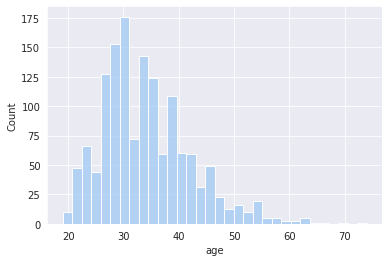

In [55]:
sns.histplot(data=data['age'])

Text(0.5, 0, 'Current Disorder by Gender and Age')

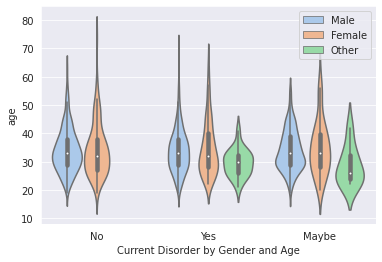

In [95]:
l = ['No', 'Yes', 'Maybe']
fig = sns.violinplot(x = 'mh_disorder_current', y = 'age', hue = 'gender', box = True, points = 'all',  data = data)
fig.set_xticklabels(l)
fig.legend(handles=fig.legend_.legendHandles, labels=['Male', 'Female', 'Other'])
fig.set_xlabel('Current Disorder by Gender and Age')

In [110]:
treatment_values = data['mh_sought_prof_treatm'].value_counts().to_frame()
gend = data['gender'].value_counts().to_frame()

gend = data['mh_sought_prof_treatm'].loc[data['gender'] == 3.0].value_counts().to_frame()

gend


,mh_sought_prof_treatm
1,25
0,2


Text(0.5, 0, 'Sought Professional Treatment')

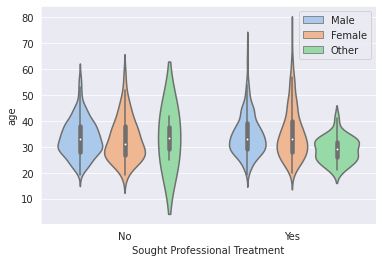

In [94]:
l = ['No', 'Yes']
fig = sns.violinplot(x = 'mh_sought_prof_treatm', y = 'age', hue = 'gender', box = True, points = 'all', title = 'Seeking Treatment by Age and Gender', data = data)
fig.set_xticklabels(l)
fig.legend(handles=fig.legend_.legendHandles, labels=['Male', 'Female', 'Other'])
fig.set_xlabel('Sought Professional Treatment')

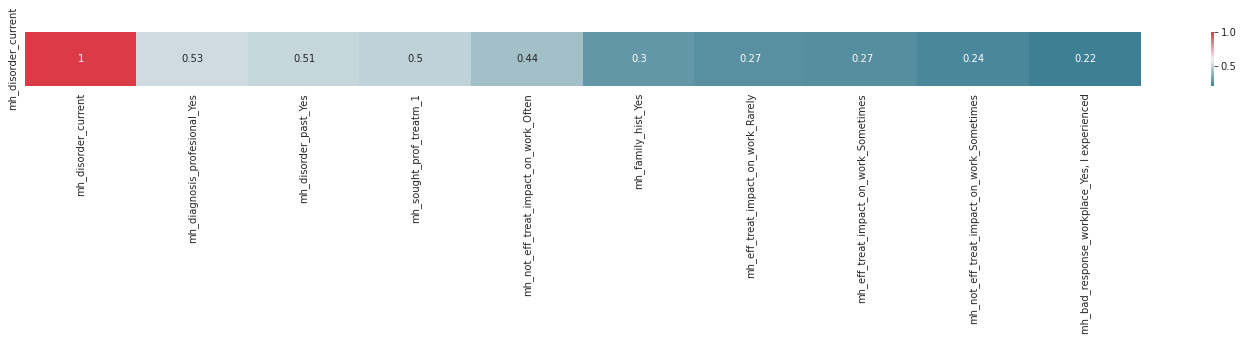

In [96]:
corr = prep_data.corr(method ='spearman')
f, ax = plt.subplots(figsize=(25, 1))
treatment = corr.sort_values(by=['mh_disorder_current'], ascending=False).head(1).T
treatment = treatment.sort_values(by=['mh_disorder_current'],ascending=False).T

treatment = treatment[treatment.columns[:10]]
sns.heatmap(treatment, cmap=cmap, annot=True)
plt.show()

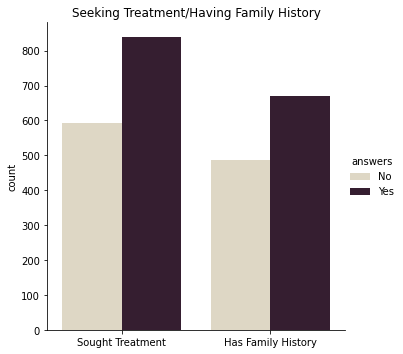

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# SOUGHT TREATMENT / FAMILY HISTORY

data['mh_sought_prof_treatm']

treatment_values = data['mh_sought_prof_treatm'].value_counts().to_frame()
family_history_values = data['mh_family_hist'].value_counts().to_frame()

#treatment_values
family_history_values = family_history_values[0:2]

#treatment_values
#family_history_values

dfs = pd.DataFrame(data={'answers': ['No', 'Yes'], 
                         'Sought Treatment': [594, 839], 
                         'Has Family History': [488, 670]})

dfs1 = pd.melt(dfs, id_vars = "answers")

sns.catplot(x = 'variable', y='value', hue = 'answers', data=dfs1, kind='bar',
            palette="ch:.33").set(ylabel='count', xlabel='', title='Seeking Treatment/Having Family History')
plt.show()

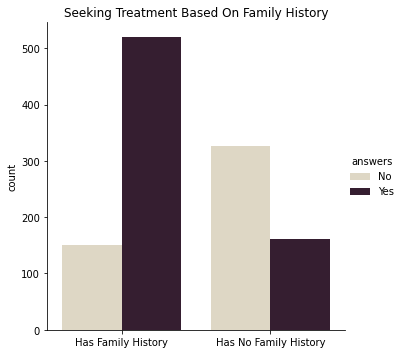

In [26]:
# SOUGHT TREATMENT BASED ON FAMILY HISTORY

treatment_values_yes = data['mh_sought_prof_treatm'].loc[data['mh_family_hist'] == 'Yes'].value_counts().to_frame()
treatment_values_no = data['mh_sought_prof_treatm'].loc[data['mh_family_hist'] == 'No'].value_counts().to_frame()

treatment_values_yes # 150, 520
treatment_values_no # 326, 162

dfs = pd.DataFrame(data={'answers': ['No', 'Yes'], 
                         'Has Family History': [150, 520], 
                         'Has No Family History': [326, 162]})

dfs1 = pd.melt(dfs, id_vars = "answers")

sns.catplot(x = 'variable', y='value', hue = 'answers', data=dfs1, kind='bar',
            palette="ch:.33").set(ylabel='count', xlabel='', title='Seeking Treatment Based On Family History')
plt.show()


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
rf.fit(X_train, y_train)
y_predF = rf.predict(X_test)

print(f'insample:\t {rf.score(X_train, y_train)}')
print(f'outsample:\t {rf.score(X_test, y_test)}')

cm = confusion_matrix(y_test, y_predF)
print(confusion_matrix(y_test, y_predF))

# fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
# print(f'auc:\t{metrics.auc(fpr, tpr)}')

#metrics.plot_roc_curve(rf, X_test, y_test)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()

### XGBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

boost=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)

In [ ]:
boost.score(X_test,y_test)
boost_predict=boost.predict(X_test)
print(f'insample:\t {boost.score(X_train, y_train)}')
print(f'outsample:\t {boost.score(X_test, y_test)}')

cm = confusion_matrix(y_test, boost_predict)
print(cm)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=boost.classes_)
disp.plot()